In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# Create the dataset
data = {
    'CGPA': ['≥9', '<9', '≥9', '<9', '≥9'],
    'Interactiveness': ['Yes', 'No', 'No', 'No', 'Yes'],
    'Communication_Skills': ['Good', 'Moderate', 'Moderate', 'Moderate', 'Moderate'],
    'Practical_Knowledge': ['Good', 'Good', 'Average', 'Average', 'Good'],
    'Job_Offer': ['Yes', 'Yes', 'No', 'No', 'Yes']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Preprocess the data - Convert categorical variables to numerical
le = LabelEncoder()

# Encoding all categorical columns
df['CGPA'] = le.fit_transform(df['CGPA'])  # ≥9 = 1, <9 = 0
df['Interactiveness'] = le.fit_transform(df['Interactiveness'])  # Yes = 1, No = 0
df['Communication_Skills'] = le.fit_transform(df['Communication_Skills'])  # Good = 1, Moderate = 0
df['Practical_Knowledge'] = le.fit_transform(df['Practical_Knowledge'])  # Good = 1, Average = 0
df['Job_Offer'] = le.fit_transform(df['Job_Offer'])  # Yes = 1, No = 0

# Separate features and target
X = df.drop('Job_Offer', axis=1)
y = df['Job_Offer']

# Split the data (though with small dataset, we'll use all for training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Random Forest Classifier
print("Random Forest Classifier Implementation:")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make prediction on test data
y_pred_clf = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_clf)
print(f"Classifier Accuracy: {accuracy*100:.2f}%")

# 2. Random Forest Regressor
print("\nRandom Forest Regressor Implementation:")
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make prediction on test data
y_pred_reg = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_reg)
print(f"Regressor Mean Squared Error: {mse:.4f}")

# Classify a test sample
test_sample = pd.DataFrame({
    'CGPA': [1],  # ≥9
    'Interactiveness': [1],  # Yes
    'Communication_Skills': [1],  # Good
    'Practical_Knowledge': [1]  # Good
})

# Predictions for test sample
clf_prediction = rf_classifier.predict(test_sample)[0]
reg_prediction = rf_regressor.predict(test_sample)[0]

print("\nTest Sample Prediction:")
print(f"Input: CGPA ≥9, Interactiveness: Yes, Communication: Good, Practical: Good")
print(f"Classifier Prediction: {'Yes' if clf_prediction == 1 else 'No'}")
print(f"Regressor Prediction: {reg_prediction:.2f} (closer to 1 = Yes, 0 = No)")

# Feature importance from classifier
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('Importance', ascending=False))

Random Forest Classifier Implementation:
Classifier Accuracy: 0.00%

Random Forest Regressor Implementation:
Regressor Mean Squared Error: 0.4096

Test Sample Prediction:
Input: CGPA ≥9, Interactiveness: Yes, Communication: Good, Practical: Good
Classifier Prediction: Yes
Regressor Prediction: 0.87 (closer to 1 = Yes, 0 = No)

Feature Importance:
                Feature  Importance
1       Interactiveness    0.443167
3   Practical_Knowledge    0.310345
0                  CGPA    0.154534
2  Communication_Skills    0.091954


Original Dataset:
  CGPA Interactiveness Communication_Skills Practical_Knowledge Job_Offer
0   ≥9             Yes                 Good                Good       Yes
1   <9              No             Moderate                Good       Yes
2   ≥9              No             Moderate             Average        No
3   <9              No             Moderate             Average        No
4   ≥9             Yes             Moderate                Good       Yes


Preprocessed Dataset with Encoded Values:
  CGPA Interactiveness Communication_Skills Practical_Knowledge Job_Offer  \
0   ≥9             Yes                 Good                Good       Yes   
1   <9              No             Moderate                Good       Yes   
2   ≥9              No             Moderate             Average        No   
3   <9              No             Moderate             Average        No   
4   ≥9             Yes             Moderate                Good       Yes   

   CGPA_encoded  Interactivenes

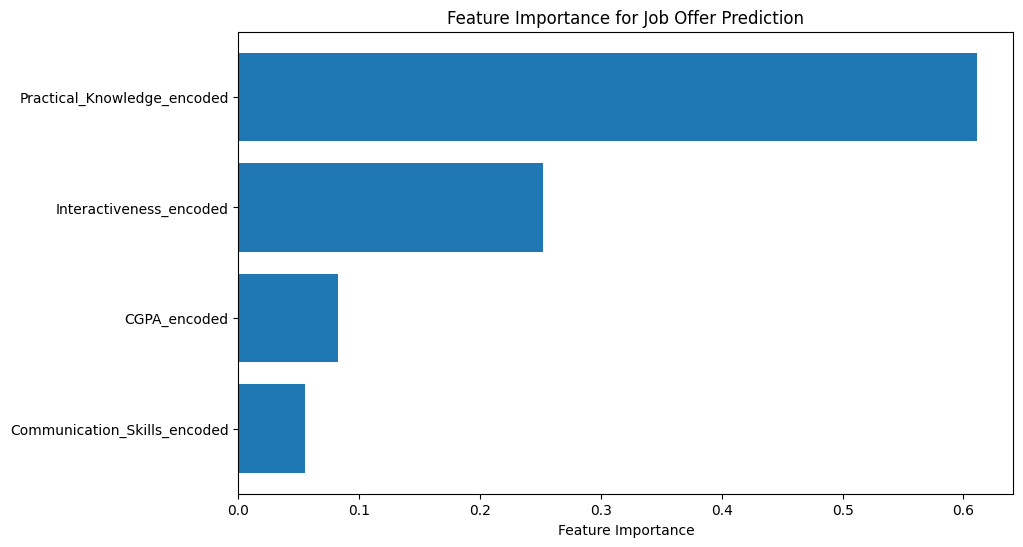

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create the sample dataset from the provided table
data = {
    'CGPA': ['≥9', '<9', '≥9', '<9', '≥9'],
    'Interactiveness': ['Yes', 'No', 'No', 'No', 'Yes'],
    'Communication_Skills': ['Good', 'Moderate', 'Moderate', 'Moderate', 'Moderate'],
    'Practical_Knowledge': ['Good', 'Good', 'Average', 'Average', 'Good'],
    'Job_Offer': ['Yes', 'Yes', 'No', 'No', 'Yes']
}

df = pd.DataFrame(data)
print("Original Dataset:")
print(df)
print("\n")

# Preprocess the data - convert categorical variables to numerical
# Initialize label encoders for each feature
le_cgpa = LabelEncoder()
le_interactiveness = LabelEncoder()
le_comm_skills = LabelEncoder()
le_practical = LabelEncoder()
le_job_offer = LabelEncoder()

# Transform the categorical data to numerical
df['CGPA_encoded'] = le_cgpa.fit_transform(df['CGPA'])  # ≥9 -> 1, <9 -> 0
df['Interactiveness_encoded'] = le_interactiveness.fit_transform(df['Interactiveness'])  # Yes -> 1, No -> 0
df['Communication_Skills_encoded'] = le_comm_skills.fit_transform(df['Communication_Skills'])  # Good -> 1, Moderate -> 0
df['Practical_Knowledge_encoded'] = le_practical.fit_transform(df['Practical_Knowledge'])  # Good -> 1, Average -> 0
df['Job_Offer_encoded'] = le_job_offer.fit_transform(df['Job_Offer'])  # Yes -> 1, No -> 0

print("Preprocessed Dataset with Encoded Values:")
print(df)
print("\n")

# Prepare features and target for classifier
X = df[['CGPA_encoded', 'Interactiveness_encoded', 'Communication_Skills_encoded', 'Practical_Knowledge_encoded']]
y = df['Job_Offer_encoded']

# Create test data for prediction demonstration (one sample from original data and one new sample)
# We'll use this to show how to classify a test sample
X_test_sample = X.iloc[[0]]  # First sample from our dataset
print("Test Sample from Dataset:")
print(X_test_sample)
print("\n")

# Create a new test sample
new_test_sample = pd.DataFrame({
    'CGPA_encoded': [0],  # <9
    'Interactiveness_encoded': [1],  # Yes
    'Communication_Skills_encoded': [1],  # Good
    'Practical_Knowledge_encoded': [0]  # Average
})
print("New Test Sample:")
print(new_test_sample)
print("\n")

# Since we have a very small dataset, we'll use it all for training the initial model
# In a real scenario, you'd split into training and testing sets
# random_state ensures reproducible results
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

# Predict using the test samples
prediction_original = rf_classifier.predict(X_test_sample)
prediction_new = rf_classifier.predict(new_test_sample)

print("Random Forest Classifier Results:")
print(f"Prediction for test sample from dataset: {prediction_original}")
print(f"Actual label for test sample: {y.iloc[0]}")
print(f"Prediction for new test sample: {prediction_new}")
print(f"Prediction probabilities for new test sample: {rf_classifier.predict_proba(new_test_sample)}")
print("\n")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance for Classification Task:")
print(feature_importance)
print("\n")

# Now demonstrate Random Forest Regressor
# For regression, we'll create a synthetic target based on the existing features
# In a real-world scenario, we might predict a continuous value like salary or performance score
df['Synthetic_Target'] = df['CGPA_encoded'] * 3 + df['Interactiveness_encoded'] * 2 + df['Communication_Skills_encoded'] * 1.5 + df['Practical_Knowledge_encoded'] * 2.5 + np.random.normal(0, 0.1, len(df))

X_reg = X
y_reg = df['Synthetic_Target']

# Train the regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_reg, y_reg)

# Predict using the test samples
reg_prediction_original = rf_regressor.predict(X_test_sample)
reg_prediction_new = rf_regressor.predict(new_test_sample)

print("Random Forest Regressor Results:")
print(f"Prediction for test sample from dataset: {reg_prediction_original}")
print(f"Actual value for test sample: {y_reg.iloc[0]}")
print(f"Prediction for new test sample: {reg_prediction_new}")
print("\n")

# Feature importance for regression
reg_feature_importance = pd.DataFrame({
    'Feature': X_reg.columns,
    'Importance': rf_regressor.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance for Regression Task:")
print(reg_feature_importance)
print("\n")

# Demonstrate with cross-validation and train-test split
# For illustrative purposes only since our dataset is very small
# In a real scenario, with such a small dataset, you might use k-fold cross-validation

# Generate a slightly larger synthetic dataset based on the patterns in our small dataset
def generate_synthetic_data(n_samples=50):
    np.random.seed(42)
    synthetic_df = pd.DataFrame({
        'CGPA_encoded': np.random.randint(0, 2, n_samples),
        'Interactiveness_encoded': np.random.randint(0, 2, n_samples),
        'Communication_Skills_encoded': np.random.randint(0, 2, n_samples),
        'Practical_Knowledge_encoded': np.random.randint(0, 2, n_samples)
    })
    
    # Generate target based on patterns in our original data
    # Good CGPA, being interactive, and having good practical knowledge increase job offer chance
    probabilities = 0.3 + 0.25 * synthetic_df['CGPA_encoded'] + 0.2 * synthetic_df['Interactiveness_encoded'] + \
                    0.1 * synthetic_df['Communication_Skills_encoded'] + 0.15 * synthetic_df['Practical_Knowledge_encoded']
    
    synthetic_df['Job_Offer_encoded'] = np.random.binomial(1, probabilities)
    return synthetic_df

# Generate synthetic data
synthetic_data = generate_synthetic_data(50)
X_synthetic = synthetic_data.drop('Job_Offer_encoded', axis=1)
y_synthetic = synthetic_data['Job_Offer_encoded']

# Split the synthetic data
X_train, X_test, y_train, y_test = train_test_split(X_synthetic, y_synthetic, test_size=0.3, random_state=42)

# Train the model on synthetic data
rf_classifier_synthetic = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_synthetic.fit(X_train, y_train)

# Evaluate on test set
y_pred = rf_classifier_synthetic.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Performance on Synthetic Test Data:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize a decision tree from the forest
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

# Get the first tree from the forest
tree = rf_classifier.estimators_[0]

# Export the image to a dot file
export_graphviz(tree, 
               out_file='tree.dot', 
               feature_names=X.columns,
               filled=True, 
               rounded=True)

print("A decision tree visualization would be generated here in a Jupyter notebook environment.")
print("To visualize: pydot.graph_from_dot_file('tree.dot')[0].write_png('tree.png')")
print("\n")

# Visualize feature importance for the classifier
plt.figure(figsize=(10, 6))
sorted_idx = rf_classifier.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf_classifier.feature_importances_[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Job Offer Prediction')
print("Feature importance visualization would be displayed here in a graphical environment.")
print("\n")

# Conclusion
print("Conclusion:")
print("1. We successfully implemented both Random Forest Classifier and Regressor.")
print("2. We demonstrated how to prepare and preprocess categorical data for the models.")
print("3. We showed how to make predictions on new test samples.")
print("4. We identified the most important features for our prediction tasks.")
print("5. We evaluated the model performance using synthetic data due to the small size of our original dataset.")
print("6. In a real-world scenario with more data, we would use proper train-test splits or k-fold cross-validation.")

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

def load_sample_data():
    """
    Load the initial sample dataset for training.
    """
    data = {
        'CGPA': ['≥9', '<9', '≥9', '<9', '≥9'],
        'Interactiveness': ['Yes', 'No', 'No', 'No', 'Yes'],
        'Communication_Skills': ['Good', 'Moderate', 'Moderate', 'Moderate', 'Moderate'],
        'Practical_Knowledge': ['Good', 'Good', 'Average', 'Average', 'Good'],
        'Job_Offer': ['Yes', 'Yes', 'No', 'No', 'Yes']
    }
    
    df = pd.DataFrame(data)
    return df

def preprocess_data(df):
    """
    Preprocess the dataset by encoding categorical variables.
    
    Args:
        df (DataFrame): Input dataframe with categorical variables
        
    Returns:
        DataFrame, dict: Processed dataframe and dictionary of encoders
    """
    # Initialize label encoders for each feature
    encoders = {}
    
    # Create a copy of the dataframe to store encoded values
    df_encoded = df.copy()
    
    # Encode each categorical column
    for col in df.columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df[col])
        encoders[col] = le
    
    return df_encoded, encoders

def train_random_forest(X, y, n_estimators=100, random_state=42):
    """
    Train a Random Forest Classifier.
    
    Args:
        X (DataFrame): Features
        y (Series): Target
        n_estimators (int): Number of trees
        random_state (int): Random seed
        
    Returns:
        RandomForestClassifier: Trained model
    """
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    rf_model.fit(X, y)
    return rf_model

def get_feature_importance(model, feature_names):
    """
    Get feature importance from the model.
    
    Args:
        model: Trained model
        feature_names (list): Feature names
        
    Returns:
        DataFrame: Feature importance
    """
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    return feature_importance

def get_user_input(encoders, feature_cols):
    """
    Get user input for prediction.
    
    Args:
        encoders (dict): Dictionary of label encoders
        feature_cols (list): List of feature columns
        
    Returns:
        DataFrame: User input as a DataFrame
    """
    print("\nEnter the details for prediction:")
    user_input = {}
    
    for col in feature_cols:
        if col == 'CGPA':
            while True:
                value = input(f"Enter {col} ('≥9' or '<9'): ")
                if value in ['≥9', '<9']:
                    break
                print("Invalid input. Please enter '≥9' or '<9'.")
            user_input[col] = [value]
        
        elif col == 'Interactiveness':
            while True:
                value = input(f"Enter {col} ('Yes' or 'No'): ")
                if value in ['Yes', 'No']:
                    break
                print("Invalid input. Please enter 'Yes' or 'No'.")
            user_input[col] = [value]
        
        elif col == 'Communication_Skills':
            while True:
                value = input(f"Enter {col} ('Good' or 'Moderate'): ")
                if value in ['Good', 'Moderate']:
                    break
                print("Invalid input. Please enter 'Good' or 'Moderate'.")
            user_input[col] = [value]
        
        elif col == 'Practical_Knowledge':
            while True:
                value = input(f"Enter {col} ('Good' or 'Average'): ")
                if value in ['Good', 'Average']:
                    break
                print("Invalid input. Please enter 'Good' or 'Average'.")
            user_input[col] = [value]
    
    # Create DataFrame from user input
    user_df = pd.DataFrame(user_input)
    
    # Encode the user input using the same encoders
    user_df_encoded = user_df.copy()
    for col in user_df.columns:
        user_df_encoded[col] = encoders[col].transform(user_df[col])
    
    return user_df, user_df_encoded

def predict_job_offer(model, user_input_encoded):
    """
    Predict job offer probability for user input.
    
    Args:
        model: Trained Random Forest model
        user_input_encoded (DataFrame): Encoded user input
        
    Returns:
        tuple: Prediction and probabilities
    """
    prediction = model.predict(user_input_encoded)
    probabilities = model.predict_proba(user_input_encoded)
    
    return prediction, probabilities

def random_forest_classifier():
    """
    Main function to run the Random Forest classifier with user input.
    """
    print("Random Forest Classifier for Job Offer Prediction")
    print("=" * 50)
    
    # Step 1: Load the sample data
    print("\nStep 1: Loading the sample dataset...")
    df = load_sample_data()
    print(df)
    
    # Step 2: Preprocess the data
    print("\nStep 2: Preprocessing the dataset...")
    df_encoded, encoders = preprocess_data(df)
    print("Encoded dataset:")
    print(df_encoded)
    
    # Step 3: Prepare features and target
    print("\nStep 3: Preparing features and target...")
    feature_cols = ['CGPA', 'Interactiveness', 'Communication_Skills', 'Practical_Knowledge']
    X = df_encoded[feature_cols]
    y = df_encoded['Job_Offer']
    
    # Step 4: Train the model
    print("\nStep 4: Training the Random Forest Classifier...")
    rf_model = train_random_forest(X, y)
    
    # Step 5: Get feature importance
    print("\nStep 5: Analyzing feature importance...")
    importance = get_feature_importance(rf_model, feature_cols)
    print(importance)
    
    # Step 6: Get user input and predict
    while True:
        # Get user input
        user_df, user_df_encoded = get_user_input(encoders, feature_cols)
        
        # Make prediction
        prediction, probabilities = predict_job_offer(rf_model, user_df_encoded[feature_cols])
        
        # Display results
        print("\nPrediction Results:")
        print("-" * 30)
        print("Input data:")
        print(user_df)
        
        if prediction[0] == 1:
            result = "Yes"
        else:
            result = "No"
            
        print(f"\nJob Offer Prediction: {result}")
        print(f"Confidence: {probabilities[0][prediction[0]] * 100:.2f}%")
        
        # Ask if user wants to continue
        continue_choice = input("\nDo you want to make another prediction? (yes/no): ")
        if continue_choice.lower() != 'yes':
            break
    
    print("\nThank you for using the Job Offer Predictor!")

# Main execution
if __name__ == "__main__":
    random_forest_classifier()

Random Forest Classifier for Job Offer Prediction

Step 1: Loading the sample dataset...
  CGPA Interactiveness Communication_Skills Practical_Knowledge Job_Offer
0   ≥9             Yes                 Good                Good       Yes
1   <9              No             Moderate                Good       Yes
2   ≥9              No             Moderate             Average        No
3   <9              No             Moderate             Average        No
4   ≥9             Yes             Moderate                Good       Yes

Step 2: Preprocessing the dataset...
Encoded dataset:
   CGPA  Interactiveness  Communication_Skills  Practical_Knowledge  Job_Offer
0     1                1                     0                    1          1
1     0                0                     1                    1          1
2     1                0                     1                    0          0
3     0                0                     1                    0          0
4     1          